Node groups:  [['B', 'C', 'A'], ['E', 'D', 'F'], ['G', 'I', 'H']]


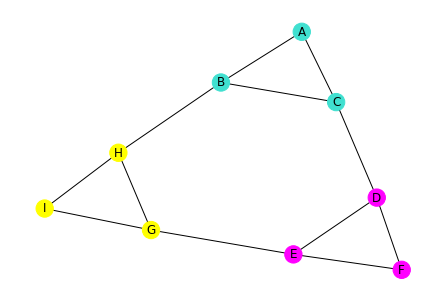

In [74]:
# Girvan Newman Implementation

from matplotlib import pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

G = {'A': ['B', 'C'],
     'B': ['A', 'C', 'H'],
     'C': ['A', 'B', 'D'],
     'D': ['C', 'E', 'F'],
     'E': ['D', 'F', 'G'],
     'F': ['D', 'E'],
     'G': ['E', 'H', 'I'],
     'H': ['B', 'G', 'I'],
     'I': ['G', 'H']
    }

G = nx.from_dict_of_lists(G)
    
communities = girvan_newman(G)
top_level_communities = next(communities)
next_level_communities = next(communities)

node_groups = []
for com in next_level_communities:
    node_groups.append(list(com))
    
print("Node groups: ", node_groups)

color_map = []

for node in G:
    if node in node_groups[0]:
        color_map.append('turquoise')
    elif node in node_groups[1]:
        color_map.append('magenta')
    else:
        color_map.append('yellow')
        
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

{'A': 0, 'B': 0, 'C': 0, 'D': 2, 'E': 2, 'F': 2, 'G': 1, 'H': 1, 'I': 1}


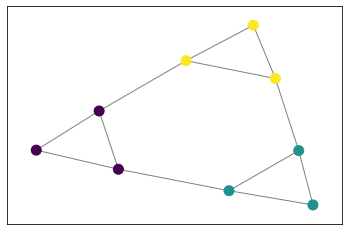

In [76]:
# Louvain Implementation

from matplotlib import cm
from matplotlib import pyplot as plt
import networkx as nx
from community import community_louvain

G = {'A': ['B', 'C'],
     'B': ['A', 'C', 'H'],
     'C': ['A', 'B', 'D'],
     'D': ['C', 'E', 'F'],
     'E': ['D', 'F', 'G'],
     'F': ['D', 'E'],
     'G': ['E', 'H', 'I'],
     'H': ['B', 'G', 'I'],
     'I': ['G', 'H']
    }

G = nx.from_dict_of_lists(G)
    
partition = community_louvain.best_partition(G)
print(partition)

pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100, cmap=cmap, node_color=list(partition.values()))     
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Node groups:  [['B', 'C', 'A'], ['E', 'D', 'F'], ['H', 'G', 'I']]


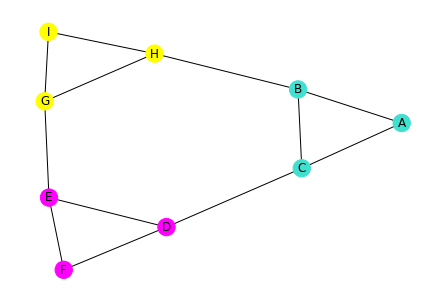

In [54]:
# Greedy Modularity Communities Implementation
# Number of communities should be 3 for all questions

from matplotlib import pyplot as plt
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

G = {'A': ['B', 'C'],
     'B': ['A', 'C', 'H'],
     'C': ['A', 'B', 'D'],
     'D': ['C', 'E', 'F'],
     'E': ['D', 'F', 'G'],
     'F': ['D', 'E'],
     'G': ['E', 'H', 'I'],
     'H': ['B', 'G', 'I'],
     'I': ['G', 'H']
    }

G = nx.from_dict_of_lists(G)
    
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
    
print("Node groups: ", node_groups)

color_map = []

for node in G:
    if node in node_groups[0]:
        color_map.append('turquoise')
    elif node in node_groups[1]:
        color_map.append('magenta')
    else:
        color_map.append('yellow')
        
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()